## Data discription and exploratory

### 1. What are the attributes, and what types are they? What is the target y?

In [14]:
# Ruoyang
# read in training dataset
import pandas as pd

df = pd.read_csv("train.csv")

In [15]:
print(df.shape)
print(df.head(5))
print(df.info())

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

In [16]:
X_train = df.drop(columns='label')
y_train = df['label']

### 2. Null values

In [17]:
# Ruoyang
df.isnull().sum().sum()

0

### 3. Plot out an image

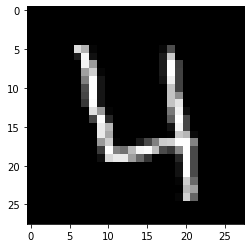

In [18]:
# Ruoyang
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

image = X_train.iloc[3]
image = np.array(image)
image = np.reshape(image, (-1,28))
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### 4. Range of the dataset

In [19]:
# Cecilia
originaldf = pd.read_csv("train.csv")
print(originaldf)
df2 = originaldf.set_index("label")
print(df2)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [20]:
# Cecilia
#range for labels
MaxLabel = originaldf["label"].max()
print("MaxLabel:", MaxLabel)
print("")
MinLabel = originaldf["label"].min()
print("MinLabel:", MinLabel)
print("")
#range of pixels for each label 
MaxPixel = df2.max(axis = 1)
print("MaxPixel:", MaxPixel)
MinPixel = df2.min(axis = 1)
print("MinPixel:", MinPixel)

MaxLabel: 9

MinLabel: 0

MaxPixel: label
1    255
0    255
1    255
4    255
0    254
    ... 
0    255
1    254
7    255
6    255
9    255
Length: 42000, dtype: int64
MinPixel: label
1    0
0    0
1    0
4    0
0    0
    ..
0    0
1    0
7    0
6    0
9    0
Length: 42000, dtype: int64


### 5. Overall distribution of pixels

In [21]:
# Ruoyang
# count overall pixel 
count_dict = {}
for col in df:
    pixel_dict = df[col].value_counts().to_dict()
    for key in pixel_dict.keys():
        if key in count_dict.keys():
            count_dict[key] += pixel_dict[key]
        else:
            count_dict[key] = pixel_dict[key]

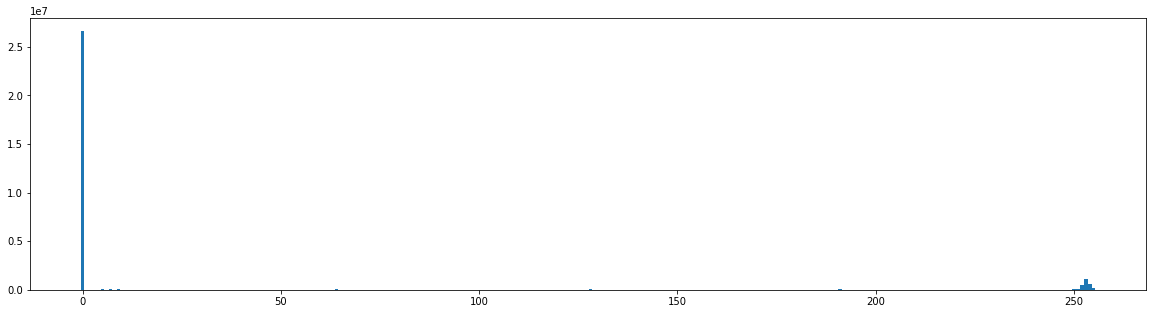

In [22]:
# Ruoyang
pixel_key = count_dict.keys()
pixel_counts = count_dict.values()

plt.figure(figsize=(20,5))
plt.bar(pixel_key, pixel_counts)
plt.show()

Distribution for pixel frequency for digit 0:


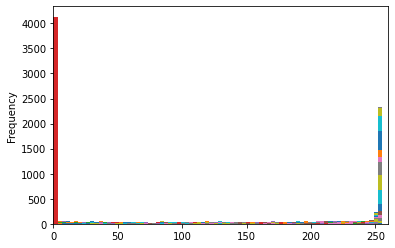

Distribution for pixel frequency for digit 1:


KeyboardInterrupt: 

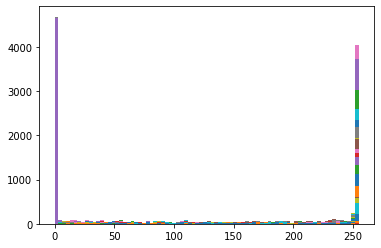

In [23]:
# Cecilia
# find pixel counts for each label
import matplotlib.pyplot as plt
for i in range(0,10):
    print(f"Distribution for pixel frequency for digit {i}:")
    df_hist = originaldf[originaldf["label"] == i]
    df_hist = df_hist.drop(columns = ["label"])
#fix x-axis range for all histograms:
#x is pixel range
    df_hist.plot.hist(bins = 80,xlim = (0,260), legend=None)
    plt.show()

### 6. Average intensity by label
##### For each label, find the average intensity of all pixels and all instances.

min and max intensity among all instances is: 6.480254777070064 and 101.25222929936305


<AxesSubplot:xlabel='label'>

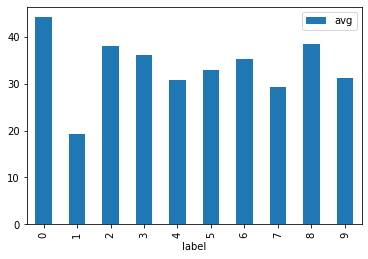

In [28]:
# Ruoyang, shranay
# Get intensity by label
df_avg_intensity = pd.DataFrame()
df_avg_intensity['label'] = df['label']
df_avg_intensity['avg']=df.mean(axis=1)
print(f"min and max intensity among all instances is: {df_avg_intensity['avg'].min()} and {df_avg_intensity['avg'].max()}")

df_avg_by_label = df_avg_intensity.groupby(['label']).mean()
df_avg_by_label.plot.bar()

### 7. For each label, find the distribution of the average intensity of all pixels

Distribution of average pixel intensity for digit 0:


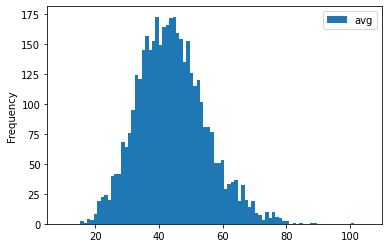

Distribution of average pixel intensity for digit 1:


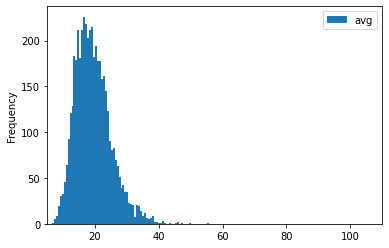

Distribution of average pixel intensity for digit 2:


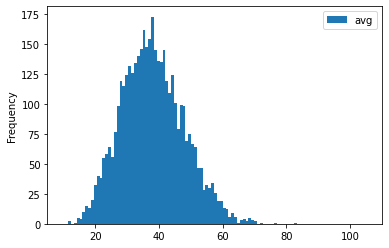

Distribution of average pixel intensity for digit 3:


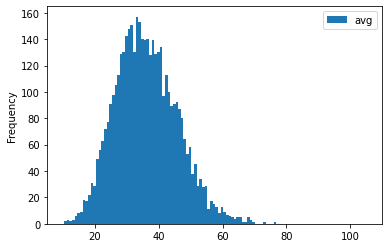

Distribution of average pixel intensity for digit 4:


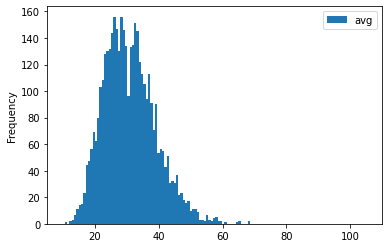

Distribution of average pixel intensity for digit 5:


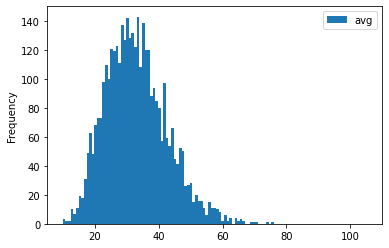

Distribution of average pixel intensity for digit 6:


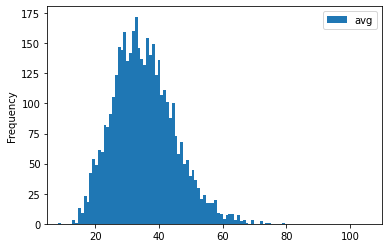

Distribution of average pixel intensity for digit 7:


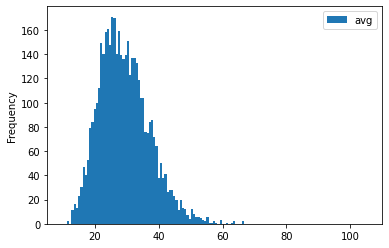

Distribution of average pixel intensity for digit 8:


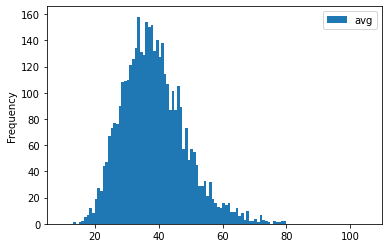

Distribution of average pixel intensity for digit 9:


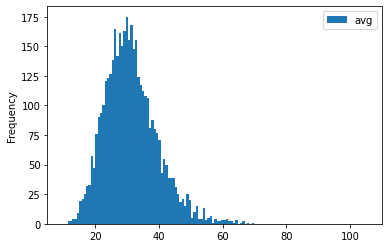

In [29]:
# Ruoyang, shranay
for i in range(0,10):
    print(f"Distribution of average pixel intensity for digit {i}:")
    df_hist2 = df_avg_intensity[df_avg_intensity['label'] == i]
    df_hist2 = df_hist2.drop(columns=["label"])
    # fix the x axis range for all histograms
    df_hist2.plot.hist(bins=80,xlim=(5,110))
    plt.show()

### 8. For each label, find the average image (centroid)
##### The most typical example of each label.

In [30]:
# Ruoyang
# group by labels
df_label = pd.DataFrame()
df_label['label'] = [0,1,2,3,4,5,6,7,8,9]

for i in range (0,784):
    col = 'pixel' + str(i)
    df_label = pd.concat((df_label,df.groupby('label')[col].mean()),axis=1)
    
print(df_label)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1      1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2      2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3      3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4      4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5      5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6      6     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7      7     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8      8     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9      9     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0

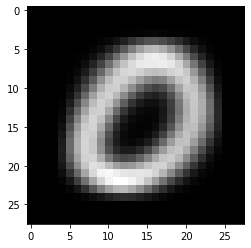

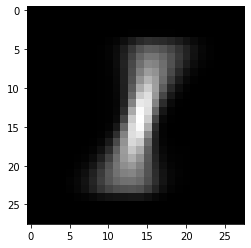

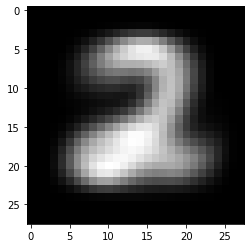

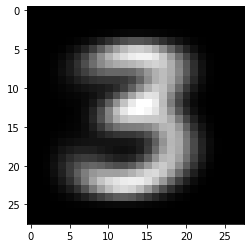

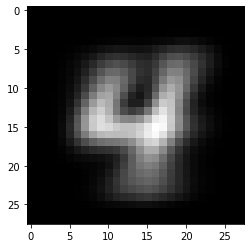

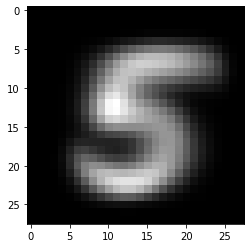

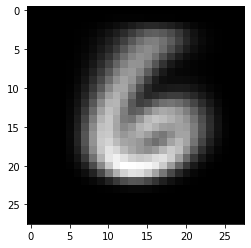

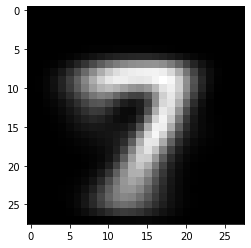

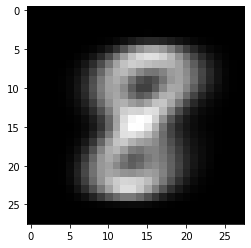

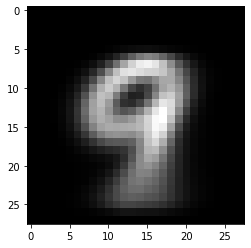

In [32]:
# Ruoyang
# Average image for each label
df_avg_pix = df_label.drop(columns='label')
for j in range(0,10):
    centroid = np.array(df_avg_pix.iloc[j])
    centroid = np.reshape(centroid, (-1,28))
    fig = plt.figure
    plt.imshow(centroid, cmap='gray')
    plt.show()

### 9. Comparing all instances of each label to their centroid: boxplot, and draw out the top 4-5 atypical cases for each label

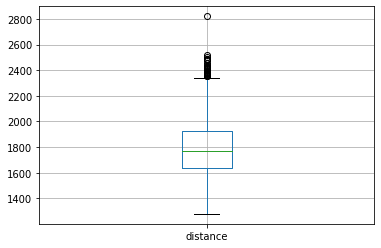

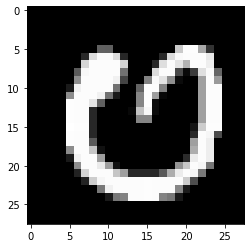

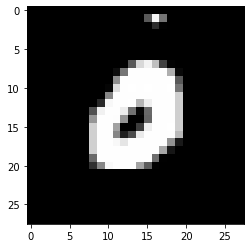

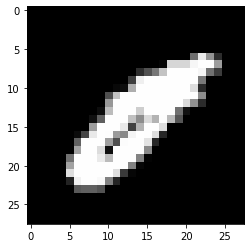

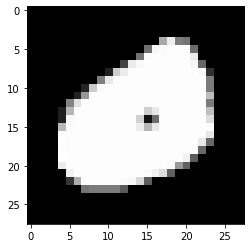

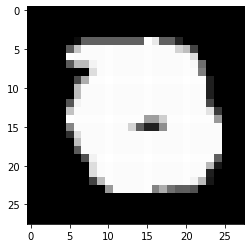

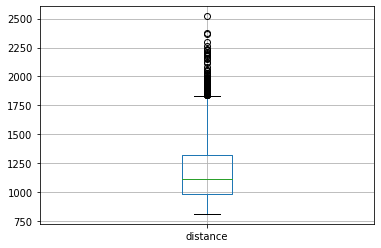

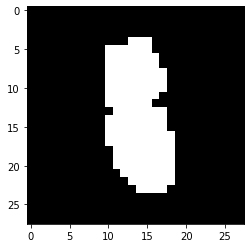

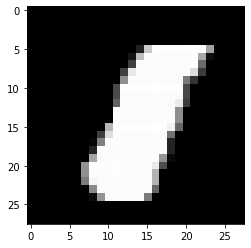

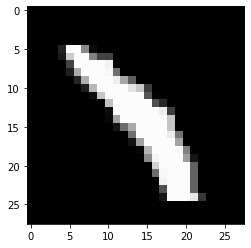

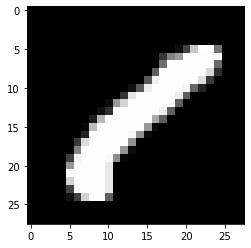

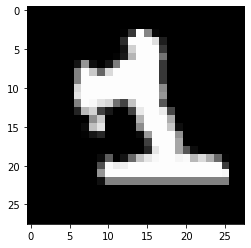

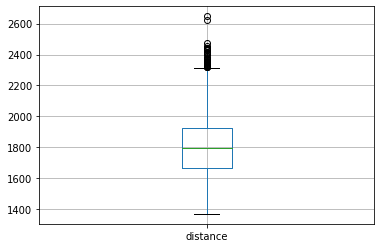

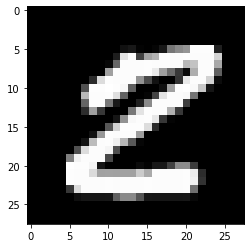

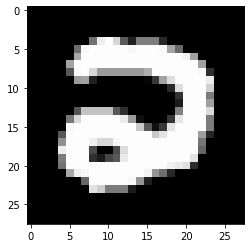

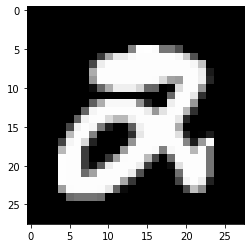

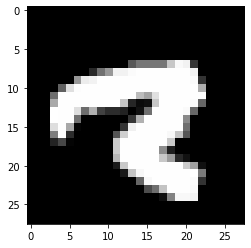

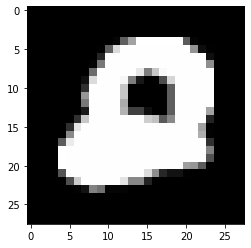

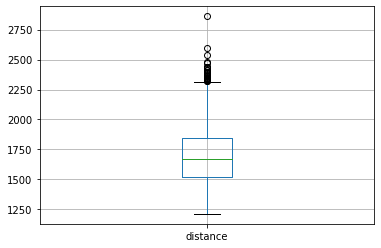

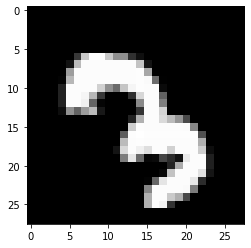

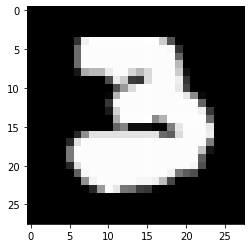

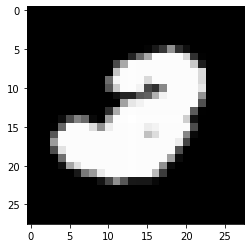

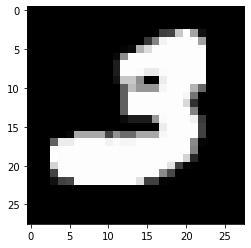

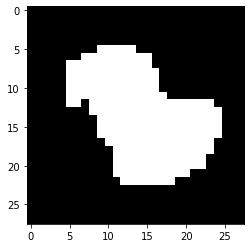

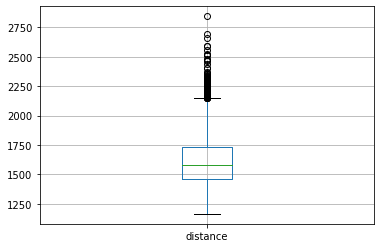

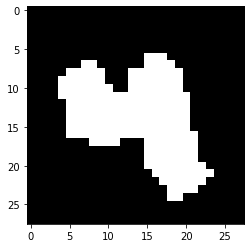

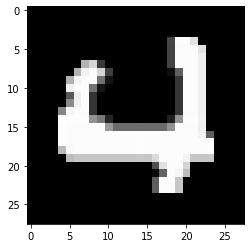

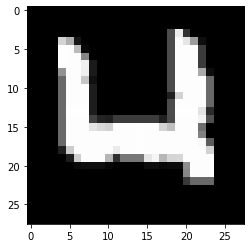

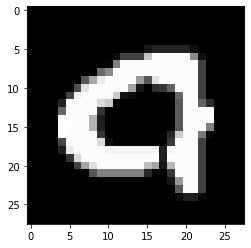

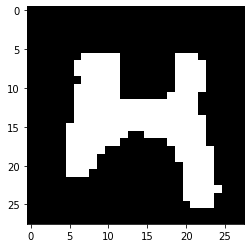

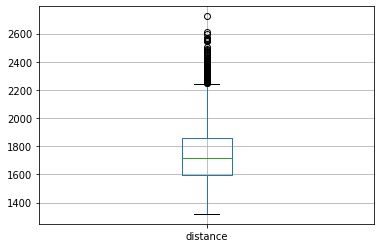

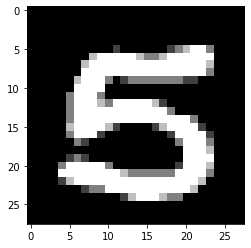

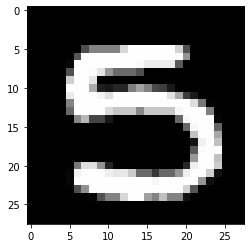

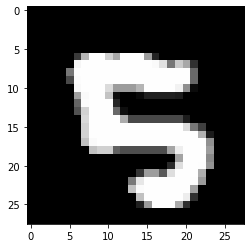

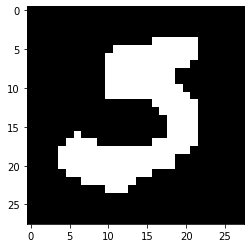

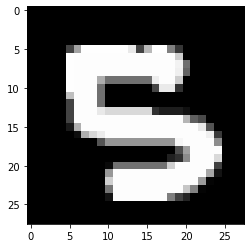

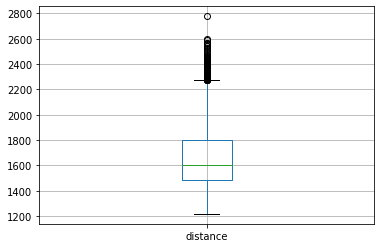

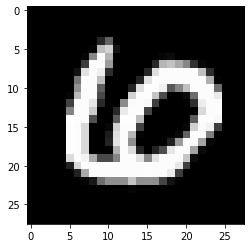

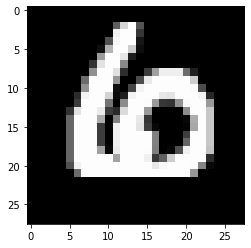

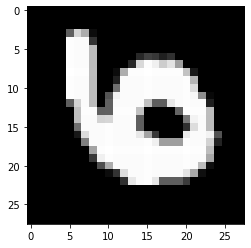

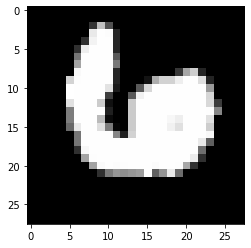

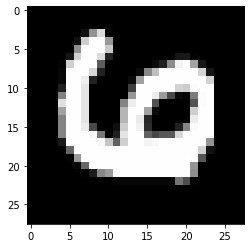

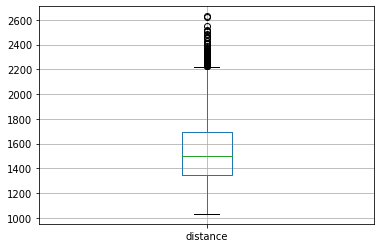

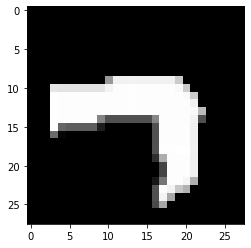

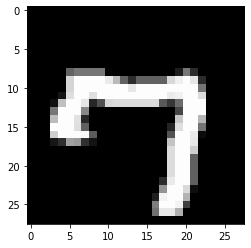

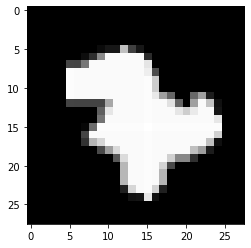

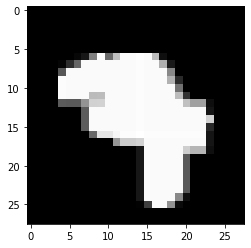

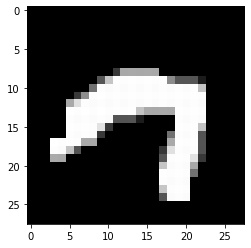

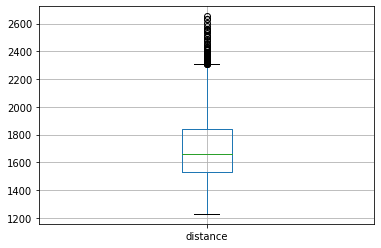

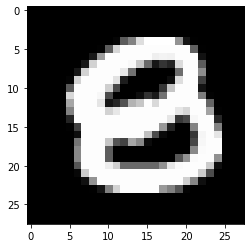

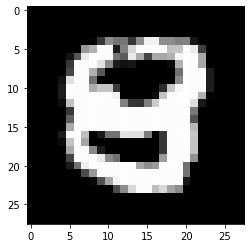

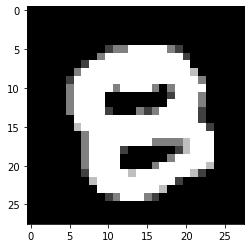

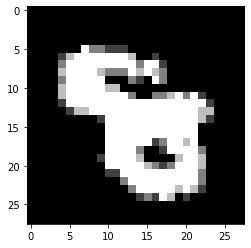

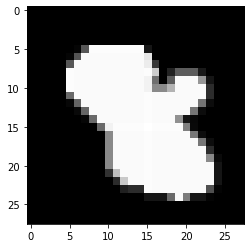

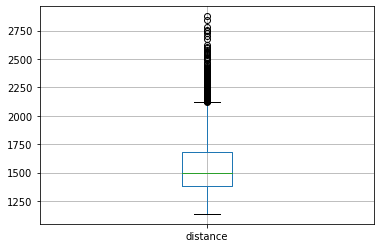

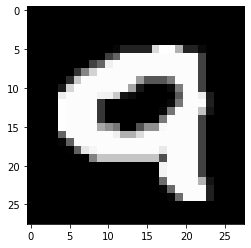

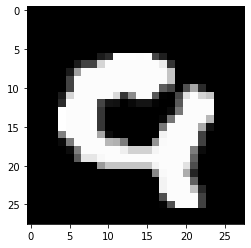

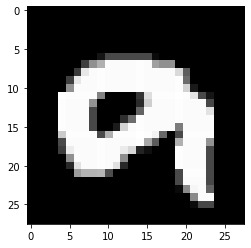

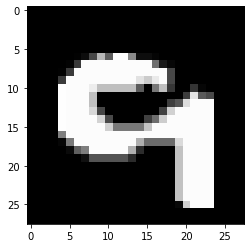

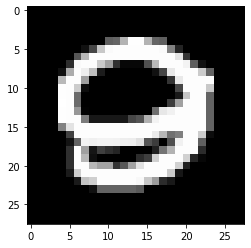

In [33]:
# Ruoyang
for i in range(0,10):
    # Calculate euclidean distance
    label = df[df['label']==i]
    distance = label.sub(df_avg_pix.iloc[i], axis=1).pow(2).sum(axis=1).pow(.5)
    distance = distance.to_frame(name="distance")

    distance.boxplot()
    plt.show()

    # sort by distance
    sort_dist = distance.sort_values(by=['distance'])
    last_5 = sort_dist.tail(5).index.to_list()

    for k in range(0,5):
        atypical = X_train.iloc[last_5[k]]
        atypical = np.array(atypical)
        atypical = np.reshape(atypical, (-1,28))
        fig = plt.figure
        plt.imshow(atypical, cmap='gray')
        plt.show()

### 10. Pairwise comparison between each pair of labels' centroids

In [34]:
# Ruoyang
df_arr = pd.DataFrame()
df_arr['repeat0'] = df_avg_pix.apply(lambda r: tuple(r), axis=1).apply(np.array)
print(df_arr)

                                             repeat0
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
8  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...


In [35]:
# Ruoyang
# find cosine similarities for all pairs
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity

sim_dict = {}

for i in range(0,10):
    for j in range(0,i):
        sim = cosine_similarity(df_arr.iloc[i]['repeat0'].reshape(1,-1), df_arr.iloc[j]['repeat0'].reshape(1,-1))
        name = str(i) + str(j)
        sim_dict[name] = sim[0][0]
        print(f"Similarity between digit {i} and {j} is: {sim[0][0]}\n")


Similarity between digit 1 and 0 is: 0.44585634791685685

Similarity between digit 2 and 0 is: 0.7400653081634936

Similarity between digit 2 and 1 is: 0.6971235613646201

Similarity between digit 3 and 0 is: 0.7453187005979106

Similarity between digit 3 and 1 is: 0.690836327402196

Similarity between digit 3 and 2 is: 0.8069947504682504

Similarity between digit 4 and 0 is: 0.6599599878468948

Similarity between digit 4 and 1 is: 0.5417927011917616

Similarity between digit 4 and 2 is: 0.7517729683790817

Similarity between digit 4 and 3 is: 0.6975114355472698

Similarity between digit 5 and 0 is: 0.8406279544383233

Similarity between digit 5 and 1 is: 0.6544890060387218

Similarity between digit 5 and 2 is: 0.7742345778919337

Similarity between digit 5 and 3 is: 0.9016784192529811

Similarity between digit 5 and 4 is: 0.7795741270455459

Similarity between digit 6 and 0 is: 0.7379596495322228

Similarity between digit 6 and 1 is: 0.604142556341828

Similarity between digit 6 and 2

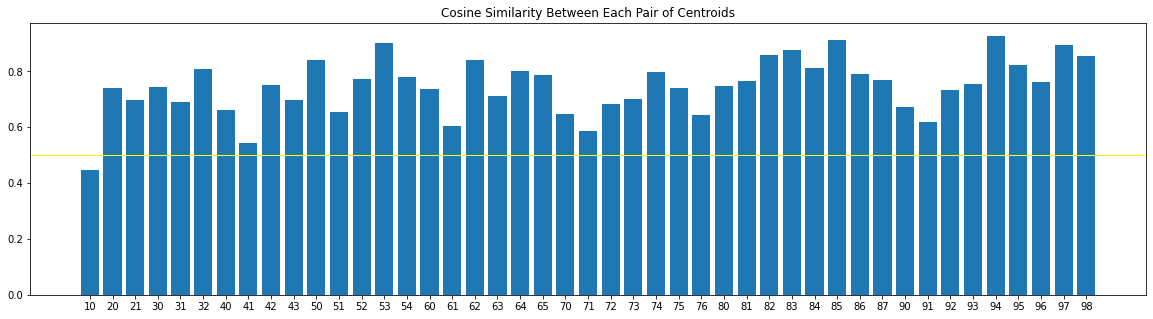

In [36]:
# Ruoyang
# plot similarity bar chart
keys = sim_dict.keys()
values = sim_dict.values()

plt.figure(figsize=(20,5))
plt.title("Cosine Similarity Between Each Pair of Centroids")
plt.bar(keys, values)
plt.axhline(y=0.5,linewidth=1, color='yellow')

#### Most pairs of digits have high cosine similarity (greater than 0.5).

In [37]:
# Ruoyang
# plot some most similar digits difference
# sort the dictionary
dict(sorted(sim_dict.items(), key=lambda item: item[1], reverse=True))

{'94': 0.9267819132897772,
 '85': 0.9124726473785154,
 '53': 0.9016784192529811,
 '97': 0.8926603942774424,
 '83': 0.8757705495949755,
 '82': 0.8586664267589965,
 '98': 0.8558735139796302,
 '62': 0.8407964578880116,
 '50': 0.8406279544383233,
 '95': 0.822988630256849,
 '84': 0.8123628151810482,
 '32': 0.8069947504682504,
 '64': 0.8003769450338339,
 '74': 0.7960182732420242,
 '86': 0.7899411440674529,
 '65': 0.7876833674011512,
 '54': 0.7795741270455459,
 '52': 0.7742345778919337,
 '87': 0.7683444716993764,
 '81': 0.7638262592339933,
 '96': 0.761818438575532,
 '93': 0.7542853595785362,
 '42': 0.7517729683790817,
 '80': 0.7465098928700251,
 '30': 0.7453187005979106,
 '75': 0.7411338635841047,
 '20': 0.7400653081634936,
 '60': 0.7379596495322228,
 '92': 0.7348826749766733,
 '63': 0.7110344188862361,
 '73': 0.7009107902487416,
 '43': 0.6975114355472698,
 '21': 0.6971235613646201,
 '31': 0.690836327402196,
 '72': 0.6815322488216986,
 '90': 0.6711288416187535,
 '40': 0.6599599878468948,
 '51

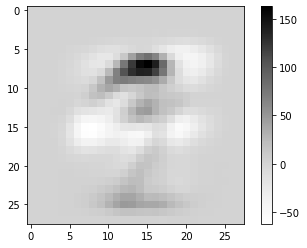

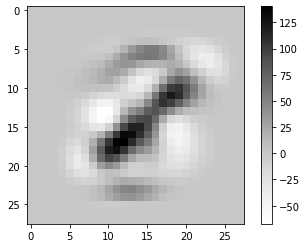

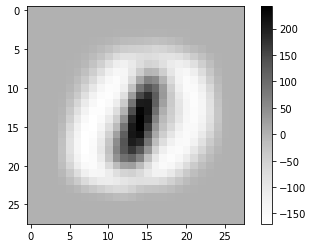

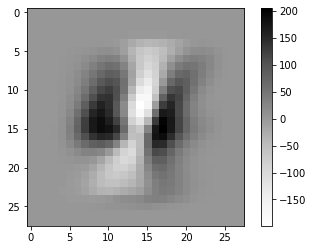

In [38]:
# Ruoyang
# calculate difference between 2 array
# the most similar: 9 and 4
diff_94 = df_arr.iloc[9]['repeat0'] - df_arr.iloc[4]['repeat0']

plt.imshow(np.reshape(diff_94, (-1,28)), cmap='Greys')
plt.colorbar()
plt.show()

# the second similar: 8 and 5
diff_85 = df_arr.iloc[8]['repeat0'] - df_arr.iloc[5]['repeat0']

plt.imshow(np.reshape(diff_85, (-1,28)), cmap='Greys')
plt.colorbar()
plt.show()

# the most different: 1 and 0
diff_10 = df_arr.iloc[1]['repeat0'] - df_arr.iloc[0]['repeat0']

plt.imshow(np.reshape(diff_10, (-1,28)), cmap='Greys')
plt.colorbar()
plt.show()

# the second different: 4 and 1
diff_41 = df_arr.iloc[4]['repeat0'] - df_arr.iloc[1]['repeat0']

plt.imshow(np.reshape(diff_41, (-1,28)), cmap='Greys')
plt.colorbar()
plt.show()